In [16]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import rioxarray as rx
import geopandas
from shapely.geometry import mapping



In [17]:
imd_rf = xr.load_dataset(r'E:\imd_rainfall_2010_2021.nc4')

In [18]:
imd_rf

<xarray.Dataset>
Dimensions:  (time: 4383, lat: 129, lon: 135)
Coordinates:
  * lat      (lat) float64 6.5 6.75 7.0 7.25 7.5 ... 37.5 37.75 38.0 38.25 38.5
  * lon      (lon) float64 66.5 66.75 67.0 67.25 67.5 ... 99.25 99.5 99.75 100.0
  * time     (time) datetime64[ns] 2010-01-01 2010-01-02 ... 2021-12-31
Data variables:
    rain     (time, lat, lon) float64 nan nan nan nan nan ... nan nan nan nan
Attributes:
    Conventions:  CF-1.7
    title:        IMD gridded data
    source:       https://imdpune.gov.in/
    history:      2022-08-02 06:35:36.178995 Python
    references:   
    comment:      
    crs:          epsg:4326

In [143]:
pune = geopandas.read_file(r'E:\pune_shapefile\pune.shp')

In [20]:
os = indsp[indsp['distname'] == 'Osmanabad']

In [21]:
os.to_file(r'C:\Users\mohan\OneDrive\Desktop\Osmanabad\osmanabad')

C:\Users\mohan\anaconda3\envs\Geopandas\lib\site-packages\geopandas\io\file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [141]:
pune = indsp[indsp['distname'] == 'Pune']

<AxesSubplot:>

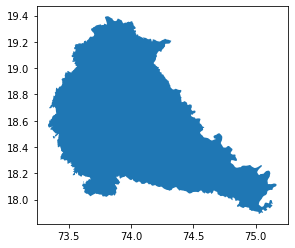

In [144]:
pune.plot()

In [145]:
MSWEP_monthly2 = imd_rf.rain
MSWEP_monthly2.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
MSWEP_monthly2.rio.write_crs("epsg:4326", inplace= True)
Africa_Shape = geopandas.read_file(r'E:\pune_shapefile\pune.shp', crs="epsg:4326")
clipped = MSWEP_monthly2.rio.clip(Africa_Shape.geometry.apply(mapping), Africa_Shape.crs, drop=True)

In [146]:
clipped

<xarray.DataArray 'rain' (time: 4383, lat: 6, lon: 7)>
array([[[       nan,        nan,        nan, ...,        nan,
                nan, 0.        ],
        [       nan, 0.        , 0.        , ..., 0.        ,
         0.        ,        nan],
        [0.        , 0.        , 0.        , ..., 0.        ,
                nan,        nan],
        [0.        , 0.        , 0.        , ...,        nan,
                nan,        nan],
        [       nan, 0.        , 0.        , ...,        nan,
                nan,        nan],
        [       nan, 0.        , 0.        , ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan, 0.        ],
        [       nan, 0.        , 0.        , ..., 0.        ,
         0.        ,        nan],
        [0.        , 0.        , 0.        , ..., 0.        ,
                nan,        nan],
        [0.        , 0.        , 0.        , ...,        nan,
...
                nan,        nan],
        [0.        , 0.        , 0.        , ...,        nan,
                nan,        nan],
        [       nan, 0.        , 0.        , ...,        nan,
                nan,        nan],
        [       nan, 0.        , 0.        , ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan, 0.        ],
        [       nan, 0.        , 0.        , ..., 0.        ,
         0.        ,        nan],
        [0.        , 0.        , 0.        , ..., 0.        ,
                nan,        nan],
        [0.        , 0.        , 0.        , ...,        nan,
                nan,        nan],
        [       nan, 0.        , 0.        , ...,        nan,
                nan,        nan],
        [       nan, 0.        , 0.        , ...,        nan,
                nan,        nan]]])
Coordinates:
  * lat          (lat) float64 18.0 18.25 18.5 18.75 19.0 19.25
  * lon          (lon) float64 73.5 73.75 74.0 74.25 74.5 74.75 75.0
  * time         (time) datetime64[ns] 2010-01-01 2010-01-02 ... 2021-12-31
    spatial_ref  int32 0
Attributes:
    units:      mm/day
    long_name:  Rainfall

In [26]:
clipped.lon[1]-clipped.lon[0]

<xarray.DataArray 'lon' ()>
array(0.25)
Coordinates:
    spatial_ref  int32 0

In [12]:
daily_pune_rf  = np.mean(clipped, axis=(1,2))

In [13]:
daily_pune_rf.shape

(4383,)

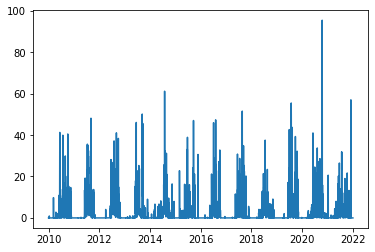

In [14]:
plt.plot(clipped.time,daily_pune_rf)

In [52]:
jjas2010_time = clipped.time[151:273]
# jjas2011_time = clipped.time[]
# jjas2012_time = clipped.time[]
# jjas2013_time = clipped.time[]
# jjas2014_time = clipped.time[]
# jjas2015_time = clipped.time[]
# jjas2016_time = clipped.time[]
# jjas2017_time = clipped.time[]
# jjas2018_time = clipped.time[]
# jjas2019_time = clipped.time[]
# jjas2020_time = clipped.time[]
# jjas2021_time = clipped.time[]


In [147]:
y2010 = clipped.sel(time=slice('2010-06-01T00:00:00.000000000', '2010-09-30T00:00:00.000000000'))
y2011 = clipped.sel(time=slice('2011-06-01T00:00:00.000000000', '2011-09-30T00:00:00.000000000'))
y2012 = clipped.sel(time=slice('2012-06-01T00:00:00.000000000', '2012-09-30T00:00:00.000000000'))
y2013 = clipped.sel(time=slice('2013-06-01T00:00:00.000000000', '2013-09-30T00:00:00.000000000'))
y2014 = clipped.sel(time=slice('2014-06-01T00:00:00.000000000', '2014-09-30T00:00:00.000000000'))
y2015 = clipped.sel(time=slice('2015-06-01T00:00:00.000000000', '2015-09-30T00:00:00.000000000'))
y2016 = clipped.sel(time=slice('2016-06-01T00:00:00.000000000', '2016-09-30T00:00:00.000000000'))
y2017 = clipped.sel(time=slice('2017-06-01T00:00:00.000000000', '2017-09-30T00:00:00.000000000'))
y2018 = clipped.sel(time=slice('2018-06-01T00:00:00.000000000', '2018-09-30T00:00:00.000000000'))
y2019 = clipped.sel(time=slice('2019-06-01T00:00:00.000000000', '2019-09-30T00:00:00.000000000'))
y2020 = clipped.sel(time=slice('2020-06-01T00:00:00.000000000', '2020-09-30T00:00:00.000000000'))
y2021 = clipped.sel(time=slice('2021-06-01T00:00:00.000000000', '2021-09-30T00:00:00.000000000'))

In [151]:
p2010_2021 = []
p2010 = np.mean(y2010,axis=(1,2))
p2010_2021.append(p2010)
p2011 = np.mean(y2011,axis=(1,2))
p2010_2021.append(p2011)
p2012 = np.mean(y2012,axis=(1,2))
p2010_2021.append(p2012)
p2013 = np.mean(y2013,axis=(1,2))
p2010_2021.append(p2013)
p2014 = np.mean(y2014,axis=(1,2))
p2010_2021.append(p2014)
p2015 = np.mean(y2015,axis=(1,2))
p2010_2021.append(p2015)
p2016 = np.mean(y2016,axis=(1,2))
p2010_2021.append(p2016)
p2017 = np.mean(y2017,axis=(1,2))
p2010_2021.append(p2017)
p2018 = np.mean(y2018,axis=(1,2))
p2010_2021.append(p2018)
p2019 = np.mean(y2019,axis=(1,2))
p2010_2021.append(p2019)
p2020 = np.mean(y2020,axis=(1,2))
p2010_2021.append(p2020)
p2021 = np.mean(y2021,axis=(1,2))
p2010_2021.append(p2021)


In [157]:
p2010_2021= np.array(p2010_2021)
p2010_2021f =p2010_2021.flatten()

In [159]:
p2010_2021f

array([ 9.20678109, 10.93668881,  1.00948738, ...,  6.33335239,
        7.57946447,  0.6188849 ])

In [44]:
y2010_time_str = str(np.array(y2010.time[:]))
# xx = []
# for i in y2010.time:
#     som = str(y2010.time)[5:10]
#     xx.append(som)
# xy = np.array(xx, dtype = 'str')

In [45]:
y2010_time_str

"['2010-06-01T00:00:00.000000000' '2010-06-02T00:00:00.000000000'\n '2010-06-03T00:00:00.000000000' '2010-06-04T00:00:00.000000000'\n '2010-06-05T00:00:00.000000000' '2010-06-06T00:00:00.000000000'\n '2010-06-07T00:00:00.000000000' '2010-06-08T00:00:00.000000000'\n '2010-06-09T00:00:00.000000000' '2010-06-10T00:00:00.000000000'\n '2010-06-11T00:00:00.000000000' '2010-06-12T00:00:00.000000000'\n '2010-06-13T00:00:00.000000000' '2010-06-14T00:00:00.000000000'\n '2010-06-15T00:00:00.000000000' '2010-06-16T00:00:00.000000000'\n '2010-06-17T00:00:00.000000000' '2010-06-18T00:00:00.000000000'\n '2010-06-19T00:00:00.000000000' '2010-06-20T00:00:00.000000000'\n '2010-06-21T00:00:00.000000000' '2010-06-22T00:00:00.000000000'\n '2010-06-23T00:00:00.000000000' '2010-06-24T00:00:00.000000000'\n '2010-06-25T00:00:00.000000000' '2010-06-26T00:00:00.000000000'\n '2010-06-27T00:00:00.000000000' '2010-06-28T00:00:00.000000000'\n '2010-06-29T00:00:00.000000000' '2010-06-30T00:00:00.000000000'\n '2010-07

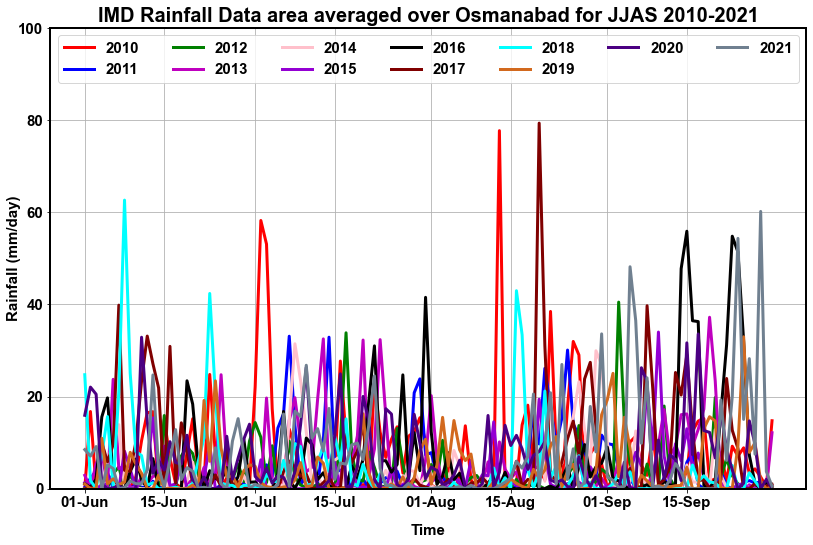

In [253]:
import matplotlib.font_manager as font_manager
fig=plt.figure(figsize=(15,8))#,constrained_layout=True)
ax = fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8,wspace=0.02, hspace=0.02)


font = font_manager.FontProperties(family='Arial',
                                   weight='bold',
                                   style='normal', size=15)


ax1 = plt.subplot(1,1, 1)        
ax1.plot(str_dates,np.nanmean(y2010, axis=(1,2)),label='2010',lw=3,c='red')
ax1.plot(str_dates,np.mean(y2011, axis=(1,2)),label='2011',lw=3,c='blue')
ax1.plot(str_dates,np.mean(y2012, axis=(1,2)),label='2012',lw=3,c='green')
ax1.plot(str_dates,np.mean(y2013, axis=(1,2)),label='2013',lw=3,c='m')
ax1.plot(str_dates,np.mean(y2014, axis=(1,2)),label='2014',lw=3,c='pink')
ax1.plot(str_dates,np.mean(y2015, axis=(1,2)),label='2015',lw=3,c='darkviolet')
ax1.plot(str_dates,np.mean(y2016, axis=(1,2)),label='2016',lw=3,c='k')
ax1.plot(str_dates,np.mean(y2017, axis=(1,2)),label='2017',lw=3,c='maroon')
ax1.plot(str_dates,np.mean(y2018, axis=(1,2)),label='2018',lw=3,c='cyan')
ax1.plot(str_dates,np.mean(y2019, axis=(1,2)),label='2019',lw=3,c='chocolate')
ax1.plot(str_dates,np.mean(y2020, axis=(1,2)),label='2020',lw=3,c='indigo')
ax1.plot(str_dates,np.mean(y2021, axis=(1,2)),label='2021',lw=3,c='slategrey')
ax1.set_ylim(0,100)
# ax1.set_xlim(0,40)
ax1.legend(loc="upper left",prop=font, mode = "expand", ncol = 7)
ax1.grid()
ax1.set_title('IMD Rainfall Data area averaged over Osmanabad for JJAS 2010-2021',fontweight="bold", size=20,family= 'Arial')
# plt.legend(prop={'family': 'Arial',"size":15,'weight':'bold'})
# ax1.set_xticks([0,5,10,15,20,25,30,35])
# ax1.set_yticks([0,0.5,1.0,1.5,2.0,2.5,3.0,3.5])
ax1.set_xticks(['01-Jun','15-Jun','01-Jul','15-Jul','01-Aug','15-Aug','01-Sep','15-Sep'])
# ax1.set_xticklabels(rotation = 45)
for tick in ax1.yaxis.get_major_ticks():
    tick.label1.set_fontsize(15)
    tick.label1.set_fontweight('bold')
for tick in ax1.xaxis.get_major_ticks():
    tick.label1.set_fontsize(15)
    tick.label1.set_fontweight('bold')
ax1.tick_params(axis='x', labelsize=15)
ax1.spines["left"].set_linewidth(2)
ax1.spines["right"].set_linewidth(2)
ax1.spines["top"].set_linewidth(2)
ax1.spines["bottom"].set_linewidth(2)
ax1.tick_params(axis='both', which='major', labelsize=15) 
for tick in ax1.get_xticklabels():
    tick.set_fontname("Arial")
for tick in ax1.get_yticklabels():
    tick.set_fontname("Arial")


    

fig.text(0.06, 0.5, 'Rainfall (mm/day)', va='center', rotation='vertical',fontsize=15,fontweight='bold',style='normal',        
         fontname='Arial')
fig.text(0.45, 0.02, 'Time', ha='center',fontsize=15,fontweight='bold',style='normal',
        fontname='Arial')

plt.savefig('IMD Rainfall Data Osmanabad 2010-2021.jpg',bbox_inches='tight',dpi=1080)

In [64]:
dates = np.arange('2018-06-01','2018-10-01',dtype = 'datetime64')

In [83]:
import datetime
str_dates = []
for i in range(0,len(dates)):
    mydate = datetime.datetime.strptime(str(dates[i]), '%Y-%m-%d')
    str_dates.append(mydate.strftime('%d-%b'))

In [84]:
str_dates

['01-Jun',
 '02-Jun',
 '03-Jun',
 '04-Jun',
 '05-Jun',
 '06-Jun',
 '07-Jun',
 '08-Jun',
 '09-Jun',
 '10-Jun',
 '11-Jun',
 '12-Jun',
 '13-Jun',
 '14-Jun',
 '15-Jun',
 '16-Jun',
 '17-Jun',
 '18-Jun',
 '19-Jun',
 '20-Jun',
 '21-Jun',
 '22-Jun',
 '23-Jun',
 '24-Jun',
 '25-Jun',
 '26-Jun',
 '27-Jun',
 '28-Jun',
 '29-Jun',
 '30-Jun',
 '01-Jul',
 '02-Jul',
 '03-Jul',
 '04-Jul',
 '05-Jul',
 '06-Jul',
 '07-Jul',
 '08-Jul',
 '09-Jul',
 '10-Jul',
 '11-Jul',
 '12-Jul',
 '13-Jul',
 '14-Jul',
 '15-Jul',
 '16-Jul',
 '17-Jul',
 '18-Jul',
 '19-Jul',
 '20-Jul',
 '21-Jul',
 '22-Jul',
 '23-Jul',
 '24-Jul',
 '25-Jul',
 '26-Jul',
 '27-Jul',
 '28-Jul',
 '29-Jul',
 '30-Jul',
 '31-Jul',
 '01-Aug',
 '02-Aug',
 '03-Aug',
 '04-Aug',
 '05-Aug',
 '06-Aug',
 '07-Aug',
 '08-Aug',
 '09-Aug',
 '10-Aug',
 '11-Aug',
 '12-Aug',
 '13-Aug',
 '14-Aug',
 '15-Aug',
 '16-Aug',
 '17-Aug',
 '18-Aug',
 '19-Aug',
 '20-Aug',
 '21-Aug',
 '22-Aug',
 '23-Aug',
 '24-Aug',
 '25-Aug',
 '26-Aug',
 '27-Aug',
 '28-Aug',
 '29-Aug',
 '30-Aug',

In [ ]:
import pandas as pd
pd_os_y2010_time = pd.Series(y2010.time)
pd_os_y2010_rf = pd.Series(np.mean(y2011, axis=(1,2)))
df = pd.DataFrame(data, columns=['Numbers'])

In [254]:
y2010

<xarray.DataArray 'rain' (time: 122, lat: 4, lon: 5)>
array([[[        nan,         nan,         nan,  0.        ,
          0.        ],
        [        nan,         nan,         nan,  0.        ,
          0.        ],
        [ 0.        ,         nan,  0.        ,  0.        ,
                 nan],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
                 nan]],

       [[        nan,         nan,         nan,  8.25070858,
          5.30529833],
        [        nan,         nan,         nan,  6.90384388,
          9.83778572],
        [34.74703217,         nan, 11.15545845,  9.24699211,
                 nan],
        [19.22946739, 38.23912811, 31.63113213,  9.760849  ,
                 nan]],

       [[        nan,         nan,         nan,  0.        ,
          0.        ],
...
        [ 7.37872934,  3.39728808,  2.27311921,  0.68604684,
                 nan]],

       [[        nan,         nan,         nan,  0.        ,
          0.        ],
        [        nan,         nan,         nan,  0.98334986,
          0.        ],
        [ 0.        ,         nan,  1.54198694,  0.84460187,
                 nan],
        [ 0.        ,  0.        ,  0.30462429,  0.44096699,
                 nan]],

       [[        nan,         nan,         nan, 10.13320541,
          0.93355864],
        [        nan,         nan,         nan, 16.67775345,
          1.0446378 ],
        [34.16791534,         nan, 20.70558167, 20.37109947,
                 nan],
        [14.15252399,  8.85847092, 12.89650059, 22.36183739,
                 nan]]])
Coordinates:
  * lat          (lat) float64 17.75 18.0 18.25 18.5
  * lon          (lon) float64 75.5 75.75 76.0 76.25 76.5
  * time         (time) datetime64[ns] 2010-06-01 2010-06-02 ... 2010-09-30
    spatial_ref  int32 0
Attributes:
    units:      mm/day
    long_name:  Rainfall

In [55]:
aa = np.array(y2010_2021_df.time,dtype='str')

In [61]:
datee = []
for m in np.arange(0,len(aa)):
    xy = aa[m][0:10]
    datee.append(xy)

In [62]:
datee

['2010-06-01',
 '2010-06-02',
 '2010-06-03',
 '2010-06-04',
 '2010-06-05',
 '2010-06-06',
 '2010-06-07',
 '2010-06-08',
 '2010-06-09',
 '2010-06-10',
 '2010-06-11',
 '2010-06-12',
 '2010-06-13',
 '2010-06-14',
 '2010-06-15',
 '2010-06-16',
 '2010-06-17',
 '2010-06-18',
 '2010-06-19',
 '2010-06-20',
 '2010-06-21',
 '2010-06-22',
 '2010-06-23',
 '2010-06-24',
 '2010-06-25',
 '2010-06-26',
 '2010-06-27',
 '2010-06-28',
 '2010-06-29',
 '2010-06-30',
 '2010-07-01',
 '2010-07-02',
 '2010-07-03',
 '2010-07-04',
 '2010-07-05',
 '2010-07-06',
 '2010-07-07',
 '2010-07-08',
 '2010-07-09',
 '2010-07-10',
 '2010-07-11',
 '2010-07-12',
 '2010-07-13',
 '2010-07-14',
 '2010-07-15',
 '2010-07-16',
 '2010-07-17',
 '2010-07-18',
 '2010-07-19',
 '2010-07-20',
 '2010-07-21',
 '2010-07-22',
 '2010-07-23',
 '2010-07-24',
 '2010-07-25',
 '2010-07-26',
 '2010-07-27',
 '2010-07-28',
 '2010-07-29',
 '2010-07-30',
 '2010-07-31',
 '2010-08-01',
 '2010-08-02',
 '2010-08-03',
 '2010-08-04',
 '2010-08-05',
 '2010-08-

In [41]:
import pandas as pd

y2010_2021_df = pd.read_excel('rf_jjas_osm_2010_2021.xlsx')

In [64]:
leb = ['2010-06-01','2010-07-01','2010-08-01','2010-09-01',
       '2011-06-01','2011-07-01','2011-08-01','2011-09-01',
       '2012-06-01','2012-07-01','2012-08-01','2012-09-01',
       '2013-06-01','2013-07-01','2013-08-01','2013-09-01',
       '2014-06-01','2014-07-01','2014-08-01','2014-09-01',
       '2015-06-01','2015-07-01','2015-08-01','2015-09-01',
       '2016-06-01','2016-07-01','2016-08-01','2016-09-01',
       '2017-06-01','2017-07-01','2017-08-01','2017-09-01',
       '2018-06-01','2018-07-01','2018-08-01','2018-09-01',
       '2019-06-01','2019-07-01','2019-08-01','2019-09-01',
       '2020-06-01','2020-07-01','2020-08-01','2020-09-01',
       '2021-06-01','2021-07-01','2021-08-01','2021-09-01']

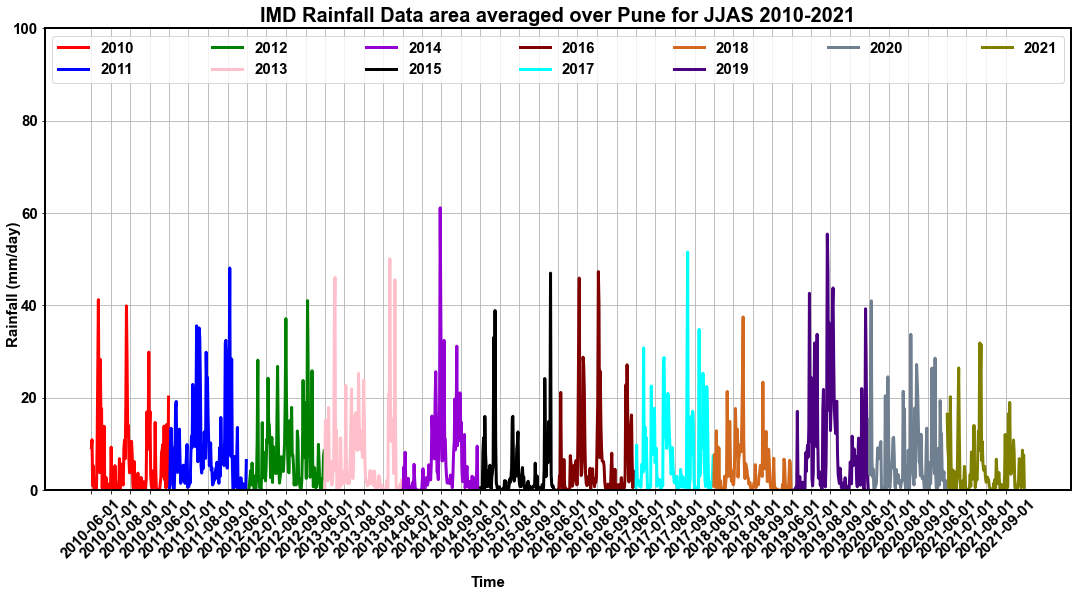

In [165]:


import matplotlib.font_manager as font_manager
fig=plt.figure(figsize=(15,8))#,constrained_layout=True)
ax = fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8,wspace=0.02, hspace=0.02)


font = font_manager.FontProperties(family='Arial',
                                   weight='bold',
                                   style='normal', size=15)


ax1 = plt.subplot(1,1, 1)        
ax1.plot(datee[0:122],p2010_2021f[0:122],label='2010',lw=3,c='red')
ax1.plot(datee[122:244],p2010_2021f[122:244],label='2011',lw=3,c='blue')
ax1.plot(datee[244:366],p2010_2021f[244:366],label='2012',lw=3,c='green')
ax1.plot(datee[366:488],p2010_2021f[366:488],label='2013',lw=3,c='pink')
ax1.plot(datee[488:610],p2010_2021f[488:610],label='2014',lw=3,c='darkviolet')
ax1.plot(datee[610:732],p2010_2021f[610:732],label='2015',lw=3,c='k')
ax1.plot(datee[732:854],p2010_2021f[732:854],label='2016',lw=3,c='maroon')
ax1.plot(datee[854:976],p2010_2021f[854:976],label='2017',lw=3,c='cyan')
ax1.plot(datee[976:1098],p2010_2021f[976:1098],label='2018',lw=3,c='chocolate')
ax1.plot(datee[1098:1220],p2010_2021f[1098:1220],label='2019',lw=3,c='indigo')
ax1.plot(datee[1220:1342],p2010_2021f[1220:1342],label='2020',lw=3,c='slategrey')
ax1.plot(datee[1342:1464],p2010_2021f[1342:1464],label='2021',lw=3,c='olive')
ax1.set_ylim(0,100)
# ax1.set_xlim(0,40)
plt.legend(prop={'family': 'Arial',"size":15,'weight':'bold'})
ax1.legend(loc="upper left",prop=font, mode = "expand", ncol = 7)
ax1.grid()
ax1.set_title('IMD Rainfall Data area averaged over Pune for JJAS 2010-2021',fontweight="bold", size=20,family= 'Arial')
ax1.set_xticks(leb)
# ax1.set_yticks([0,0.5,1.0,1.5,2.0,2.5,3.0,3.5])
# ax1.set_xticks(['01-Jun','15-Jun','01-Jul','15-Jul','01-Aug','15-Aug','01-Sep','15-Sep'])
# ax1.set_xticklabels(rotation = 45)
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
for tick in ax1.yaxis.get_major_ticks():
    tick.label1.set_fontsize(15)
    tick.label1.set_fontweight('bold')
for tick in ax1.xaxis.get_major_ticks():
    tick.label1.set_fontsize(15)
    tick.label1.set_fontweight('bold')
ax1.tick_params(axis='x', labelsize=15)
ax1.spines["left"].set_linewidth(2)
ax1.spines["right"].set_linewidth(2)
ax1.spines["top"].set_linewidth(2)
ax1.spines["bottom"].set_linewidth(2)
ax1.tick_params(axis='both', which='major', labelsize=15) 
for tick in ax1.get_xticklabels():
    tick.set_fontname("Arial")
for tick in ax1.get_yticklabels():
    tick.set_fontname("Arial")


    

fig.text(0.005, 0.5, 'Rainfall (mm/day)', va='center', rotation='vertical',fontsize=15,fontweight='bold',style='normal',        
         fontname='Arial')
fig.text(0.45, -0.025, 'Time', ha='center',fontsize=15,fontweight='bold',style='normal',
        fontname='Arial')
plt.tight_layout()
plt.savefig('IMD Rainfall Data Pune 2010-2021.jpg',bbox_inches='tight',dpi=1080)

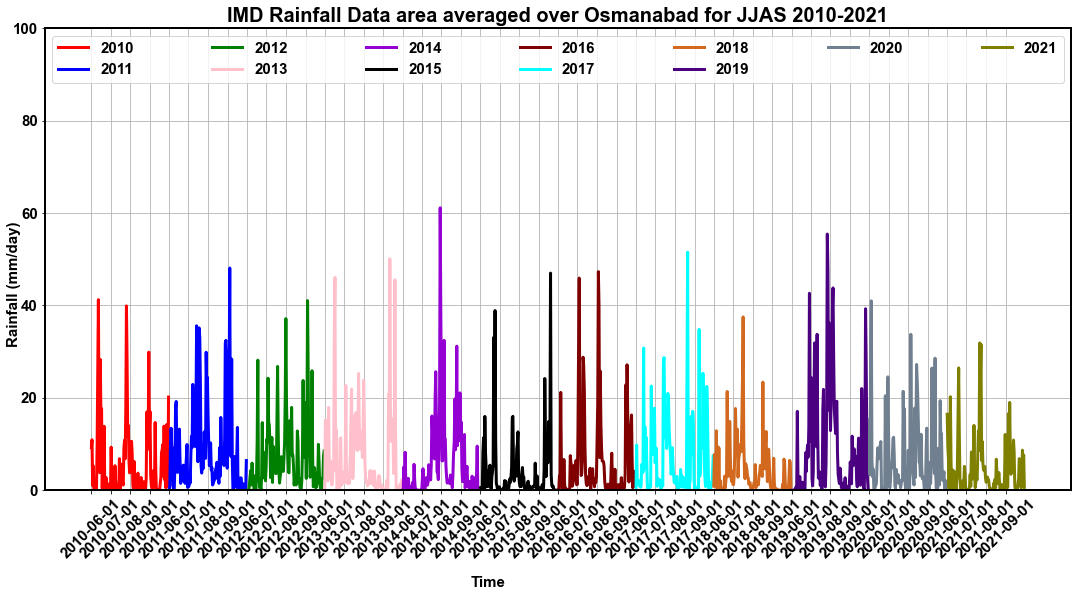

In [116]:
# datee[0:122]
# datee[122:244]
datee[244:366]
# datee[366:488]
# datee[488:610]
# datee[610:732]
# datee[732:854]
# datee[854:976]
# datee[976:1098]
# datee[1098:1220]
# datee[1220:1342]
# datee[1342:1464]
# datee[1464:1586]

['2012-06-01',
 '2012-06-02',
 '2012-06-03',
 '2012-06-04',
 '2012-06-05',
 '2012-06-06',
 '2012-06-07',
 '2012-06-08',
 '2012-06-09',
 '2012-06-10',
 '2012-06-11',
 '2012-06-12',
 '2012-06-13',
 '2012-06-14',
 '2012-06-15',
 '2012-06-16',
 '2012-06-17',
 '2012-06-18',
 '2012-06-19',
 '2012-06-20',
 '2012-06-21',
 '2012-06-22',
 '2012-06-23',
 '2012-06-24',
 '2012-06-25',
 '2012-06-26',
 '2012-06-27',
 '2012-06-28',
 '2012-06-29',
 '2012-06-30',
 '2012-07-01',
 '2012-07-02',
 '2012-07-03',
 '2012-07-04',
 '2012-07-05',
 '2012-07-06',
 '2012-07-07',
 '2012-07-08',
 '2012-07-09',
 '2012-07-10',
 '2012-07-11',
 '2012-07-12',
 '2012-07-13',
 '2012-07-14',
 '2012-07-15',
 '2012-07-16',
 '2012-07-17',
 '2012-07-18',
 '2012-07-19',
 '2012-07-20',
 '2012-07-21',
 '2012-07-22',
 '2012-07-23',
 '2012-07-24',
 '2012-07-25',
 '2012-07-26',
 '2012-07-27',
 '2012-07-28',
 '2012-07-29',
 '2012-07-30',
 '2012-07-31',
 '2012-08-01',
 '2012-08-02',
 '2012-08-03',
 '2012-08-04',
 '2012-08-05',
 '2012-08-